<a href="https://colab.research.google.com/github/SatyaRay003/Titanic-Survival-Prediction/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) of Titanic Dataset

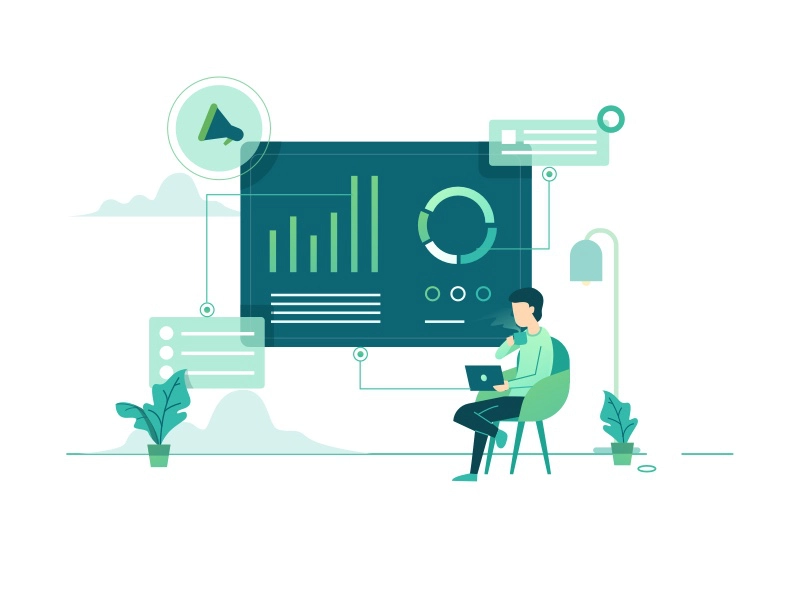

# Objective:

> The main purpose of this notebook is to analyze the different features of the Titanic Dataset.

> We will explore several useful aspects of each feature to understand their distribution and relationship with the target varable.


# Contents:


1. [Import all the necessary libraries](#Import_all_the_necessary_libraries)

2. [Basic Data Exploration](#Basic-Data-Exploration)

3. [Numerical Feature Analysis](#Numerical-Feature-Analysis)

    3.1 [Statistical Analysis](#Statistical-Analysis)

    3.2 [Multi-Variate Analysis](#Multi-Variate-Analysis)

    3.3 [Univariate Analysis](#Univariate-Analysis)

4. [Categorical Feature Analysis](#Categorical-Feature-Analysis)

    4.1 [Univariate Analysis](#Univariate-Analysis)

5. [Numerical & Categorial Multivariate Analysis](#Numerical-&-Categorial-Multivariate-Analysis)

# Clone the repo

In [1]:
!git clone https://github.com/SatyaRay003/Titanic-Survival-Prediction.git

Cloning into 'Titanic-Survival-Prediction'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 44 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


# Import all the necessary libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

sns.set(style="darkgrid", palette="muted", color_codes=True)

import warnings

# Basic Data Exploration

In [3]:
train_df = pd.read_csv('/content/Titanic-Survival-Prediction/Data/train.csv')

In [4]:
print(f'The Training Dataset contains, Rows: {train_df.shape[0]} & Columns: {train_df.shape[1]}')

The Training Dataset contains, Rows: 891 & Columns: 12


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.head().style.background_gradient(cmap='icefire')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


# Numerical Feature Analysis

In [8]:
numeric_features = train_df.select_dtypes(exclude=['object']).columns

In [9]:
numeric_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
numeric_df = train_df[numeric_features]

## Statistical Analysis

In [11]:
numeric_df.describe().T.style.background_gradient(cmap='Pastel2')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


### Heatmap

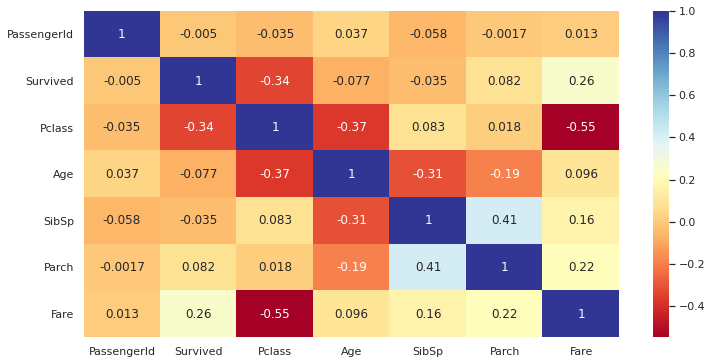

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlBu');

In [13]:
numeric_features_correlation_df = pd.DataFrame(numeric_df.corr().Survived)

In [14]:
abs(numeric_features_correlation_df).sort_values(by='Survived', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


<p><img alt="Colaboratory logo" height="45px" src="https://drive.google.com/uc?export=view&id=13yp3K1E_KmlMVairQedbmeGQIatEmFlw" align="left" hspace="10px" vspace="0px"></p>

<h1>Insights</h1>
 

> From the above Heat map we can extract following insights

1. **Pclass or Passenger Class** is most correlated numeric feature with **Survived** compared with other numeric features.

2. **Pclass or Passenger Class** and **Fare** have significant negative correlation value (***0.55***) which is as our expectation.

3. **SibSp** and **Parch** have significant positive correlation value (***0.41***)

4. **PassengerId** feature has no reasonable correlation value with any other features.


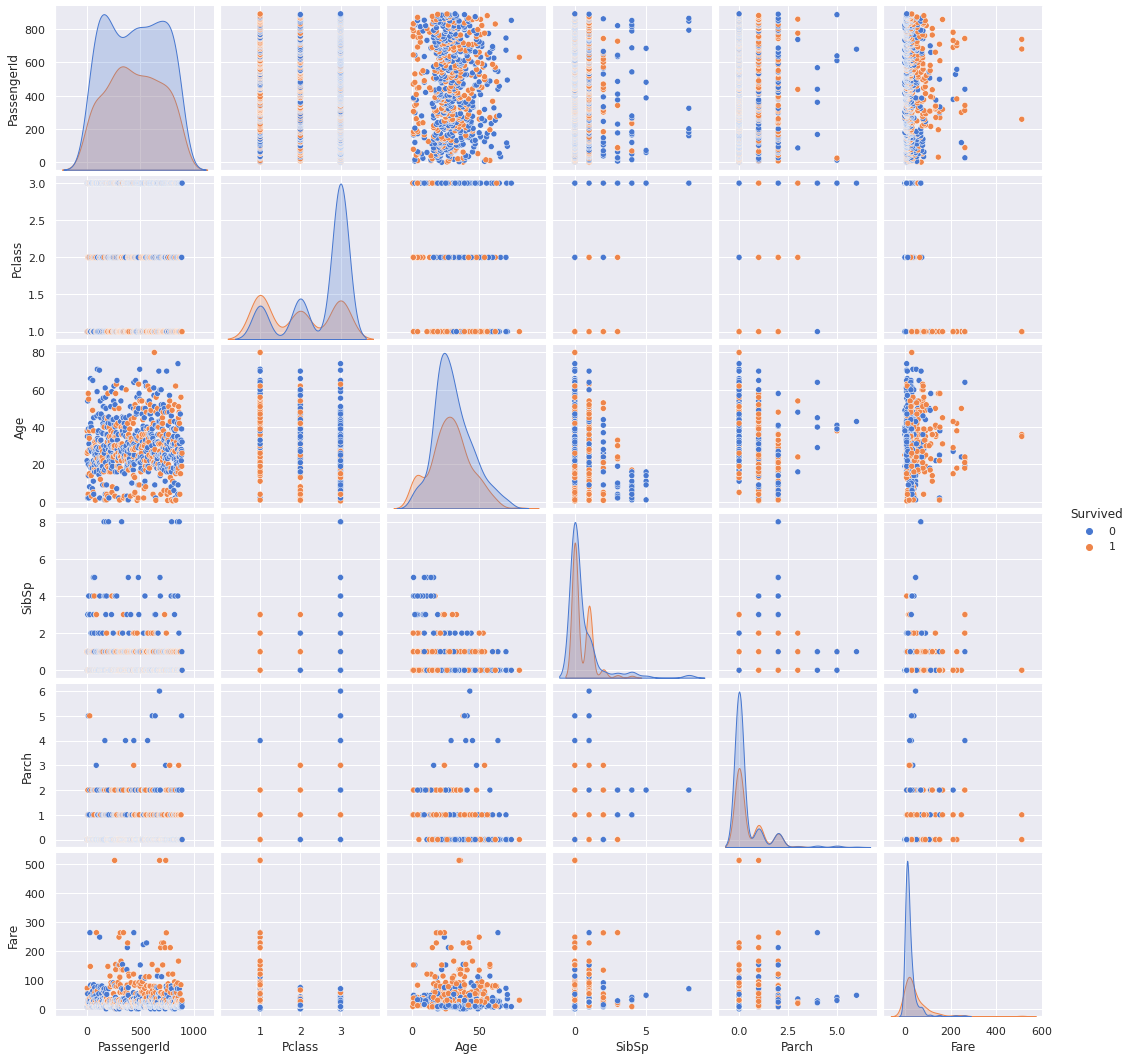

In [15]:
sns.pairplot(numeric_df, hue='Survived');

## Univariate Analysis

### Survived(Target Attribute)

> **Survived** represents the survival status of the Passenger 

> 0 = No, 1 = Yes

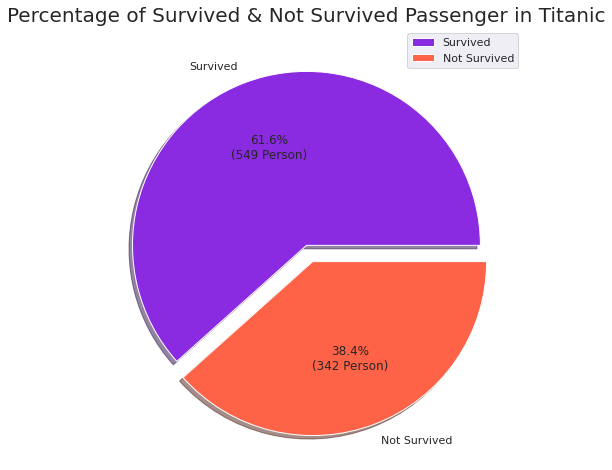

In [16]:
size = list(numeric_df['Survived'].value_counts())
labels = ['Survived', 'Not Survived']
colors = ['blueviolet', 'tomato']
explode = [0, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Person)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Survived & Not Survived Passenger in Titanic', fontsize = 20)
plt.legend()
plt.show()

<p><img alt="Colaboratory logo" height="45px" src="https://drive.google.com/uc?export=view&id=13yp3K1E_KmlMVairQedbmeGQIatEmFlw" align="left" hspace="10px" vspace="0px"></p>

<h1>Insights</h1>

- From the above figure we can observe that majority of passengers (***61.6%***) of the Titanic not able to survive.

- Only ***38.4%*** Passengers able to survive.

### Pclass or Passesnger Class

> **Pclass** represents the Corresponding Ticket classes

> 1 =  Passengers who are travelling in 1st Class

> 2 = Passengers who are travelling in 2nd Class

> 3 = Passengers who are travelling in 3rd Class

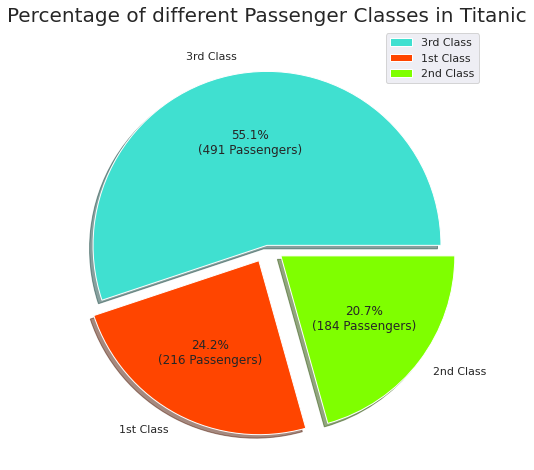

In [17]:
size = list(numeric_df['Pclass'].value_counts())
labels = ['3rd Class', '1st Class', '2nd Class']
colors = ['turquoise', 'orangered', 'chartreuse']
explode = [0, 0.1, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of different Passenger Classes in Titanic', fontsize = 20)
plt.legend()
plt.show()

<p><img alt="Colaboratory logo" height="45px" src="https://drive.google.com/uc?export=view&id=13yp3K1E_KmlMVairQedbmeGQIatEmFlw" align="left" hspace="10px" vspace="0px"></p>

<h1>Insights</h1>

- We can see that majority of the passengers (***55.1%***) in Titanic was travelling in ***3rd Passenger Class***.

- ***24.2%*** & ***20.7%*** in Titanic was travelling in ***1st & 2nd Passenger Class*** respectively.

In [58]:
def bar_plot(attribute, data, color, title, size, comparison = None):
    plt.figure(figsize=size)
    if comparison == None:
        ax = sns.countplot(x = attribute, data = data, palette=color)
    else:
        ax = sns.countplot(x = attribute, hue = comparison, data = data, palette=color)
    total = len(data)
    
    for i in ax.patches:
        percentage = '{:.2f}%'.format((i.get_height()/total)*100)
        x = i.get_x()
        y = i.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)

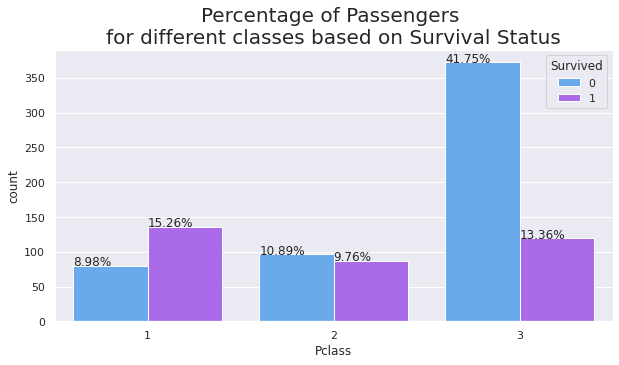

In [59]:
bar_plot('Pclass', numeric_df, 'cool', 
         "Percentage of Passengers \nfor different classes based on Survival Status", 
         (10, 5), 'Survived')

<p><img alt="Colaboratory logo" height="45px" src="https://drive.google.com/uc?export=view&id=13yp3K1E_KmlMVairQedbmeGQIatEmFlw" align="left" hspace="10px" vspace="0px"></p>

<h1>Insights</h1>

- From above figure it is inferred that majority of the passengers (***41.75%***) who were travelling in ***3rd Passenger Class*** of Titanic were not able to survive .

- The ***survival rate (15.26%
)*** of ***1st Passenger Class*** is higer than other two passenger classes.

### Fare

> **Fare** represents the ***ticket amount*** which the passenger had paid

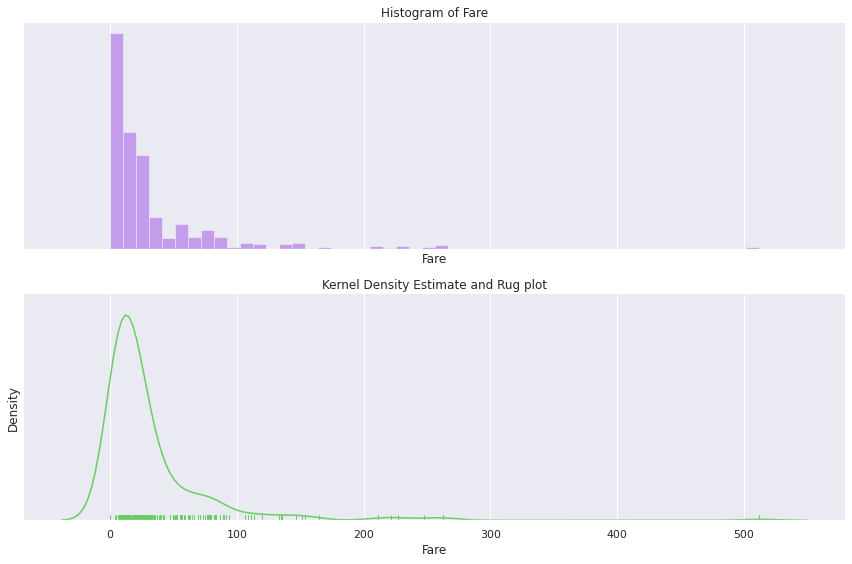

In [20]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create a subplot
f, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(numeric_df.Fare, kde=False, color="blueviolet", ax=axes[0]).set_title('Histogram of Fare')

# Plot a kernel density estimate and rug plot
sns.distplot(numeric_df.Fare, hist=False, rug=True, color="g", ax=axes[1]).set_title('Kernel Density Estimate and Rug plot')

plt.setp(axes, yticks=[])
plt.tight_layout()

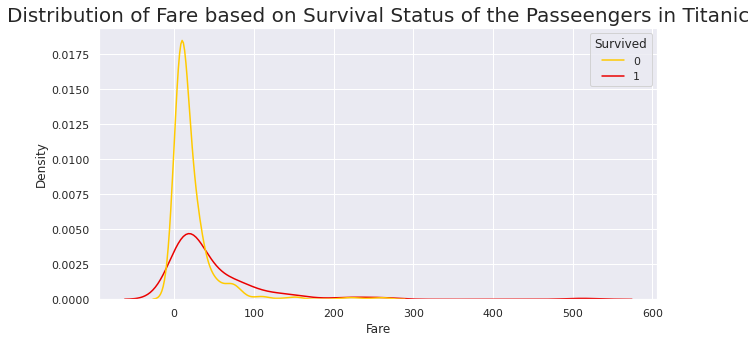

In [21]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=numeric_df, x='Fare', hue='Survived', palette="hot_r");
plt.title("Distribution of Fare based on Survival Status of the Passeengers in Titanic", fontsize = 20);

### Parch

> **Parch** represents the no. of ***parents / children*** aboard the Titanic

In [22]:
def horizontal_bar_plot(feature, dataframe, color, title, adjust, figsize, hue=None):
  # Create barplot 
  plt.figure(figsize=figsize)

  if hue == None:
    ax = sns.countplot(y=feature, data=dataframe, palette=color)
  else:
    ax = sns.countplot(y=feature, data=dataframe, palette=color, hue=hue)

  # Annotate every single Bar with its value, based on it's width           
  for p in ax.patches:
      width = p.get_width()
      plt.text(p.get_width()+adjust[0], p.get_y()+adjust[1]*p.get_height(),
              '{} Passesngers\n[{:.2f}%]'.format(int(width), width*100/train_df[feature].shape[0]),
              ha='center', va='center')
      
  plt.title(title, fontsize=23);

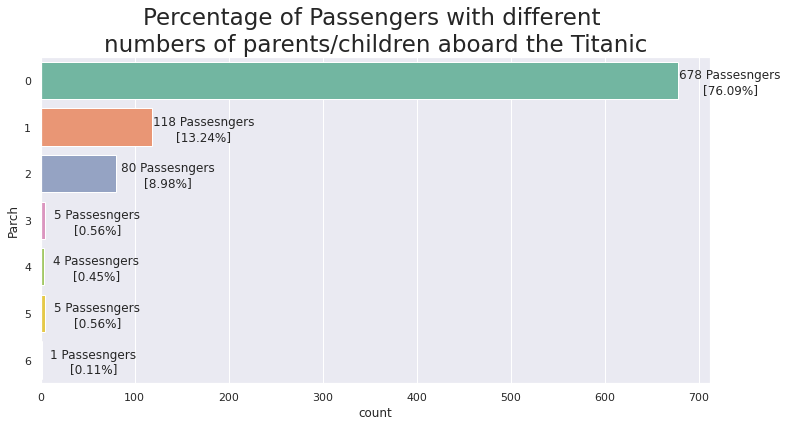

In [23]:
horizontal_bar_plot('Parch', numeric_df, 'Set2', 
                    "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic",
                    (55, 0.55), (12, 6))

<p><img alt="Colaboratory logo" height="45px" src="https://drive.google.com/uc?export=view&id=13yp3K1E_KmlMVairQedbmeGQIatEmFlw" align="left" hspace="10px" vspace="0px"></p>

<h1>Insights</h1>

- Majority of the passengers (***76.09%***) in Titanic were travelling ***alone***.

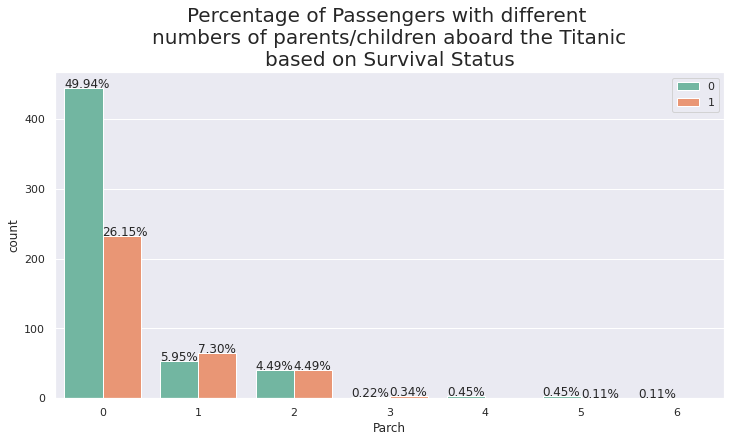

In [67]:
bar_plot('Parch', numeric_df, 'Set2', 
         "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic\nbased on Survival Status",
         (12, 6),'Survived')

plt.legend(loc='upper right');

<p><img alt="Colaboratory logo" height="45px" src="https://drive.google.com/uc?export=view&id=13yp3K1E_KmlMVairQedbmeGQIatEmFlw" align="left" hspace="10px" vspace="0px"></p>

<h1>Insights</h1>

- Majority of the passengers (***76.09%***) in Titanic were travelling ***alone***.

### Age

> As **Age** is continuous Variable, here We've considered the following standard age groups

  0 - 2 ---> Infant 

  2 - 4 ---> Toddler 

  4 - 9 ---> Child 

  9 -15 ---> Teenager 

  15 - 21 ---> Adult 

  21 - 44 ---> Mid-Age 

  44 - 60 ---> Middle Senior 

  60 - 80 ---> Old-Age

In [25]:
def Feature_Bin(attribute, data, title, comparison = None):
    
    new_df = data.copy()
    
    intervals = [0, 2, 4, 9, 15, 21, 44, 60, 80]
    labels = ['Infant', 'Toddler', 'Child', 'Teenager', 'Adult', 'Mid-Age', 'Middle Senior', 'Old-Age']
    
    a = 'Different {} Grouped_Value'.format(attribute)
    new_df[a] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    
    plt.figure(figsize=(15,8))
    
    if comparison == None:
        ax = sns.countplot(x = a, data = new_df, palette='hsv');
    else:
        ax = sns.countplot(x = a, data = new_df, hue = comparison, palette='hsv');
        
    total = len(new_df[a])
    
    for i in ax.patches:
        percentage = '{:.2f}%'.format((i.get_height()/total)*100)
        x=i.get_x()
        y=i.get_height()
        ax.annotate(percentage, (x,y))
        
    plt.title(title, size=20)

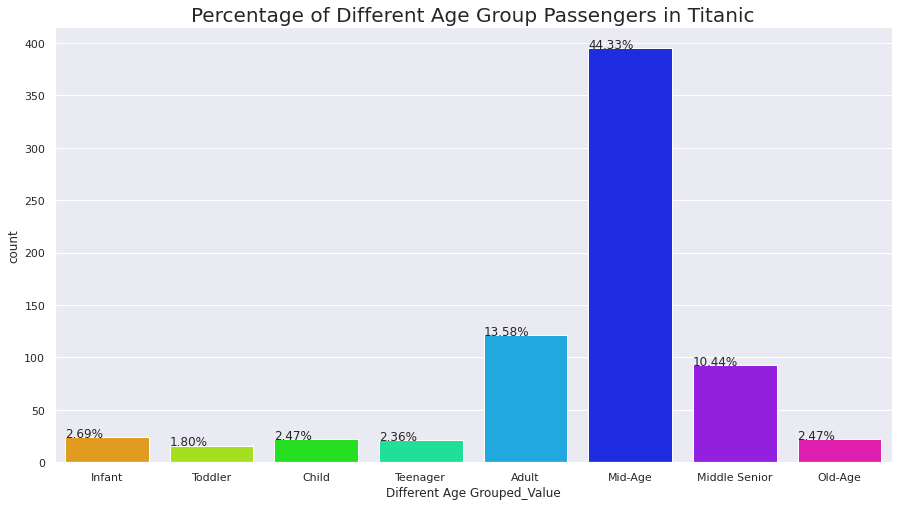

In [26]:
Feature_Bin('Age', numeric_df, 'Percentage of Different Age Group Passengers in Titanic')

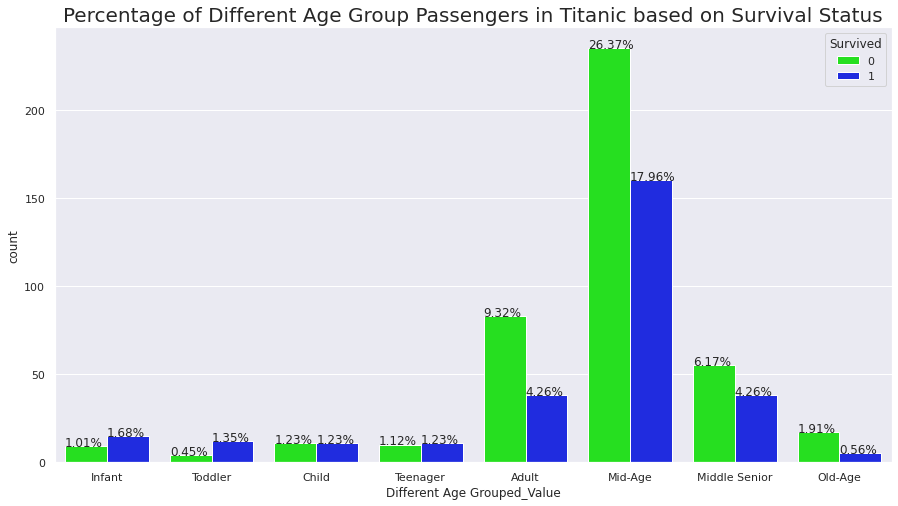

In [27]:
Feature_Bin('Age', numeric_df, 
            'Percentage of Different Age Group Passengers in Titanic based on Survival Status', 'Survived')

### SibSp

> **SibSp** represents the no. of ***siblings / spouses*** aboard the Titanic

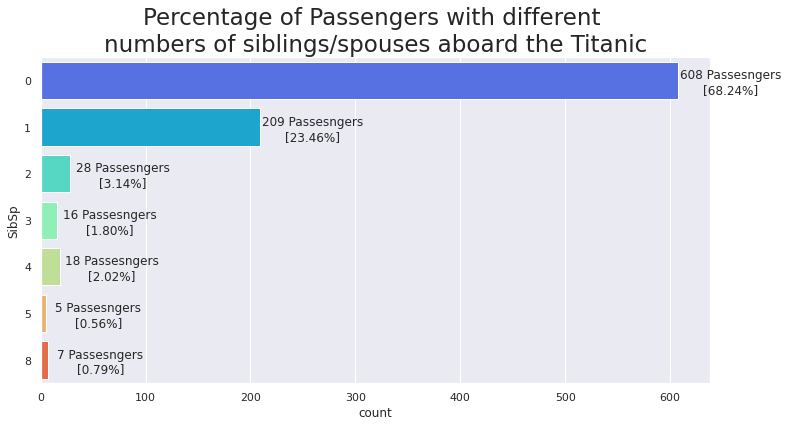

In [28]:
horizontal_bar_plot('SibSp', numeric_df, 'rainbow', 
                    "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic",
                    (50, 0.55), (12, 6))

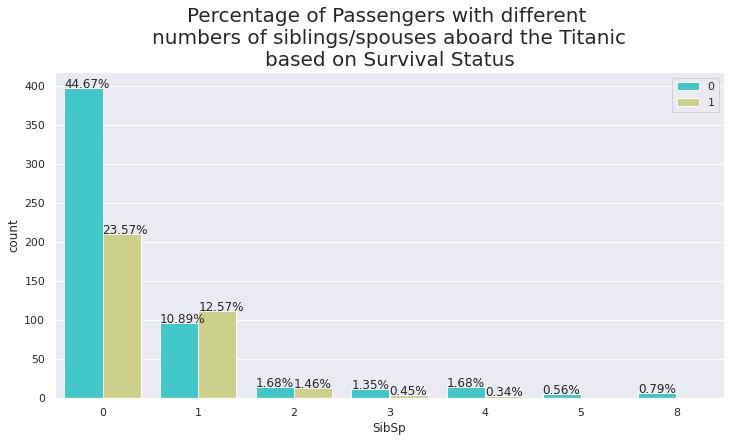

In [29]:
bar_plot('SibSp', numeric_df, 'rainbow', 
         "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic\nbased on Survival Status",
         (12, 6), 'Survived')

plt.legend(loc='upper right');

# Categorical Feature Analysis

In [30]:
categorical_features = train_df.select_dtypes(include=['object']).columns

In [31]:
categorical_features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [32]:
categorical_df = train_df[categorical_features]

## Univariate Analysis

### Embarked

> **Embarked** represents location Port of Embarkation of where the passengers

> C = Cherbourg, Q = Queenstown, S = Southampton

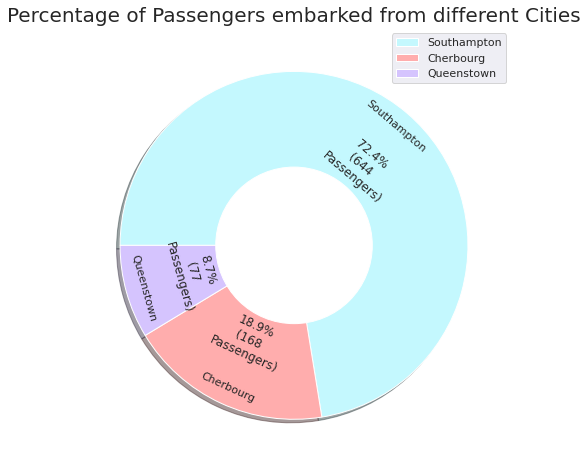

In [33]:
size = list(categorical_df['Embarked'].value_counts())
labels = ['Southampton', 'Cherbourg', 'Queenstown']
colors = ['#c4f8fe', '#ffadad', '#d5c4fe']

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} \nPassengers)".format(pct, absolute)


fig1, ax = plt.subplots(figsize=(8,8))
patches, texts, autotexts = ax.pie(size, labels = labels, colors = colors, shadow = True, 
                                    autopct = lambda pct: func(pct, size), labeldistance=0.9,
                                    startangle=180, counterclock=False, rotatelabels=True,)

plt.setp(texts, rotation_mode="anchor", ha="center", va="center")
for t, at in zip(texts, autotexts):
    rot = t.get_rotation()
    t.set_rotation(rot + 90 + (1 - rot // 180) * 180)
    at.set_rotation(t.get_rotation())


# draw circle
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


plt.title('Percentage of Passengers embarked from different Cities', fontsize = 20)
plt.legend()
plt.show()

In [34]:
list(train_df.groupby(by='Embarked')['Survived'].value_counts())

[93, 75, 47, 30, 427, 217]

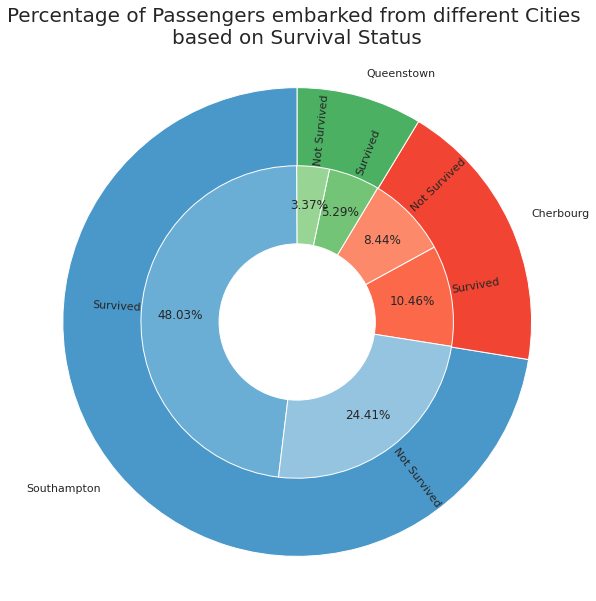

In [35]:
group_names = ['Southampton', 'Cherbourg', 'Queenstown']
group_size = list(categorical_df['Embarked'].value_counts())

subgroup_names = ['Survived', 'Not Survived']*3
subgroup_size = list(train_df.groupby(by='Embarked')['Survived'].value_counts())

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

fig, ax = plt.subplots(figsize=(7,10))
ax.axis('equal')

plt.title('Percentage of Passengers embarked from different Cities \nbased on Survival Status', fontsize = 20)

# First Ring (outside)
plt.pie(group_size, radius=1.5, labels=group_names, 
        colors=[a(0.6), b(0.6), c(0.6)], startangle=90)

# Second Ring (Inside)
plt.pie(subgroup_size, radius=1.3-0.3, 
                  labels=subgroup_names, labeldistance=1, 
                  colors=[b(0.5), b(0.4), c(0.5), c(0.4), a(0.5), a(0.4)], startangle=-9,
                  autopct = "%.2f%%", rotatelabels=True, pctdistance=0.75)

# draw circle
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

### Sex

In [36]:
sex_value_counts_df = pd.DataFrame(categorical_df['Sex'].value_counts()).reset_index().rename(columns={'index':'Sex', 'Sex':'Count'})

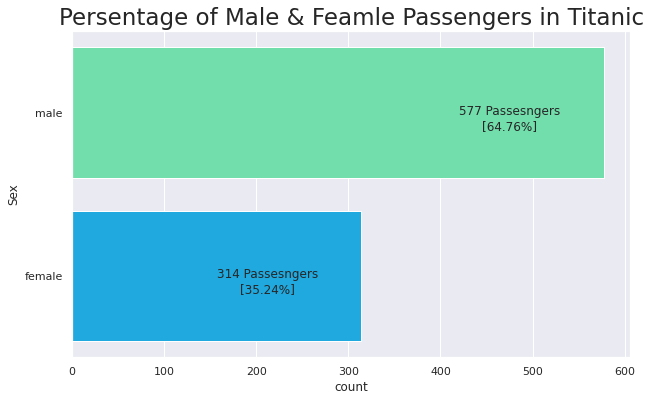

In [37]:
horizontal_bar_plot('Sex', categorical_df, ['#60f0ad', '#00b7ff'], 
                    'Persentage of Male & Feamle Passengers in Titanic',
                    (-102, 0.55), (10, 6))

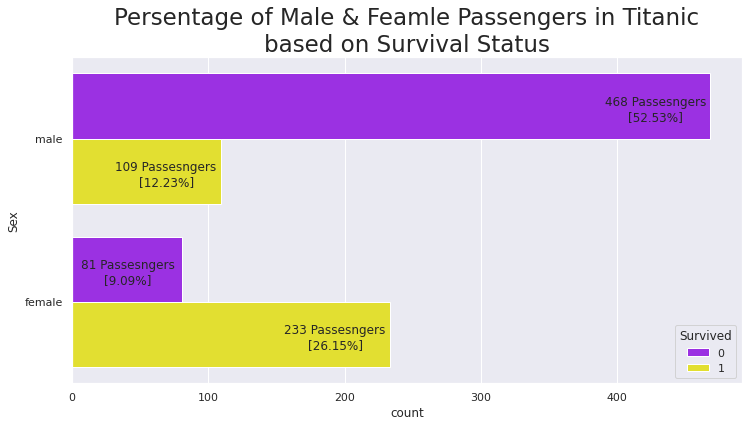

In [38]:
horizontal_bar_plot('Sex', train_df, ['#a114ff', '#fffb14'], 
                    'Persentage of Male & Feamle Passengers in Titanic\nbased on Survival Status',
                    (-40, 0.55), (12, 6), 'Survived')

# Numerical & Categorial Multivariate Analysis

### Pclass-Sex-Survived

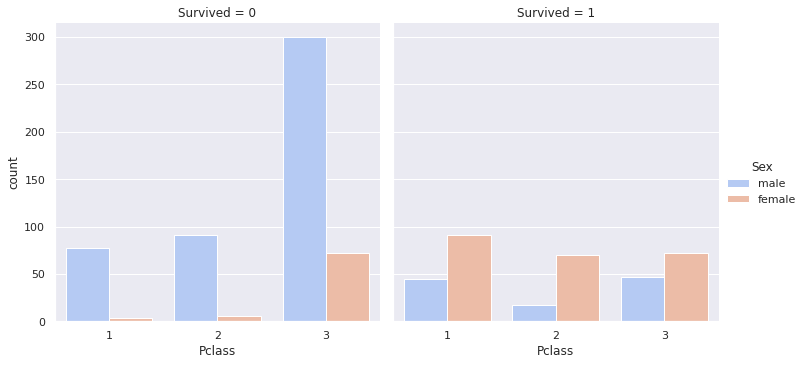

In [39]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                 data=train_df, kind="count", palette="coolwarm");

### Embarked-Sex-Survived

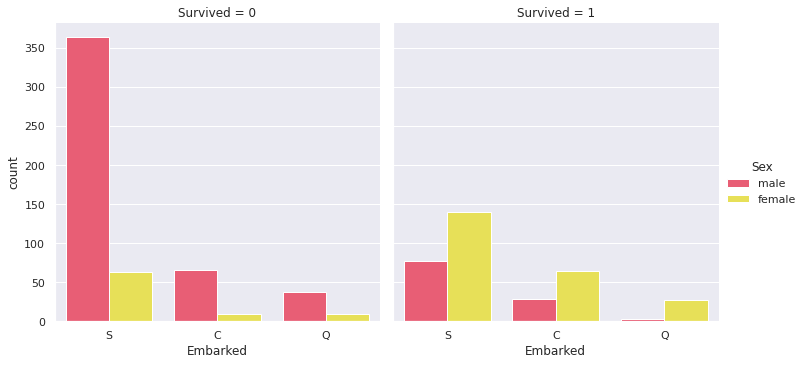

In [40]:
sns.catplot(x="Embarked", hue="Sex", col="Survived",
                 data=train_df, kind="count", palette=['#ff4766', '#fff540']);

### Embarked-Pclass-Sex-Survived

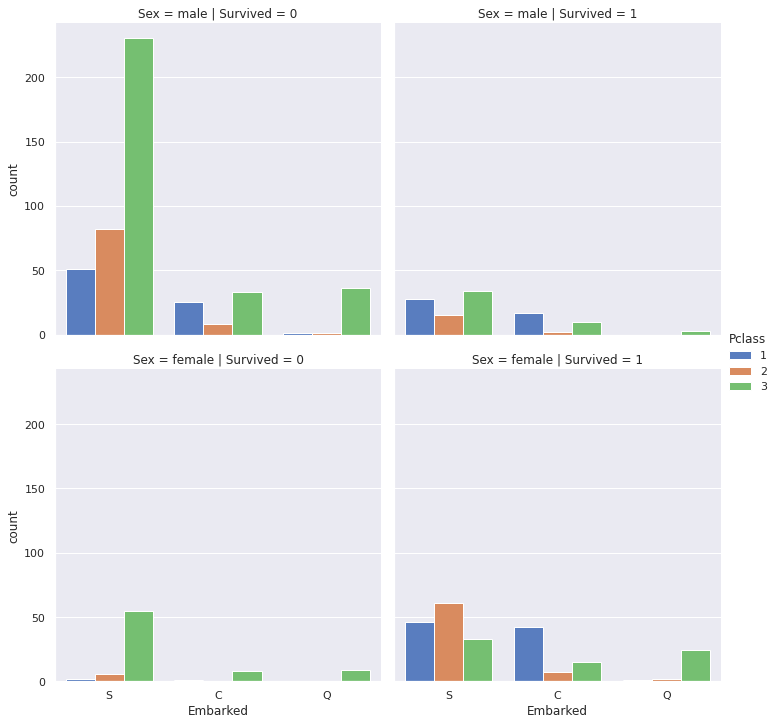

In [41]:
sns.catplot(x="Embarked", hue="Pclass", 
            row="Sex", col = 'Survived',
            data=train_df, kind="count");

### Parch-Sex-Survived

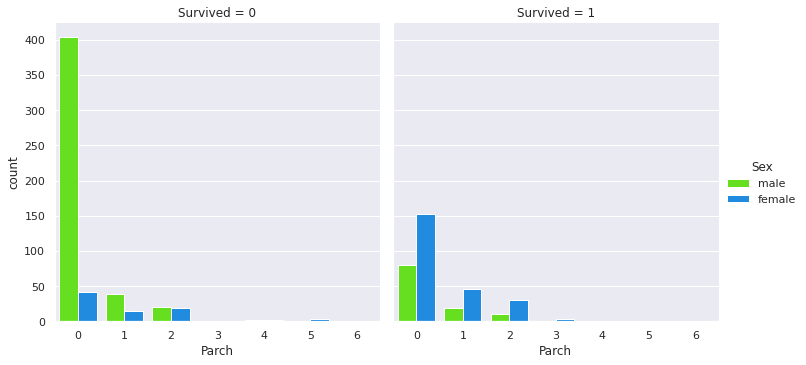

In [42]:
sns.catplot(x="Parch", hue="Sex", col="Survived",
                 data=train_df, kind="count", palette='gist_rainbow');

### SibSp-Sex-Survived

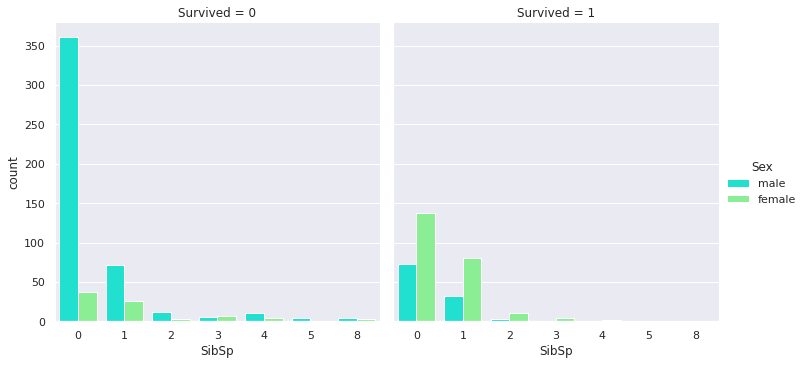

In [43]:
sns.catplot(x="SibSp", hue="Sex", col="Survived",
                 data=train_df, kind="count", palette=['#03ffea', '#7aff88']);

### Age-Embarked-Pclass-Sex-Survived

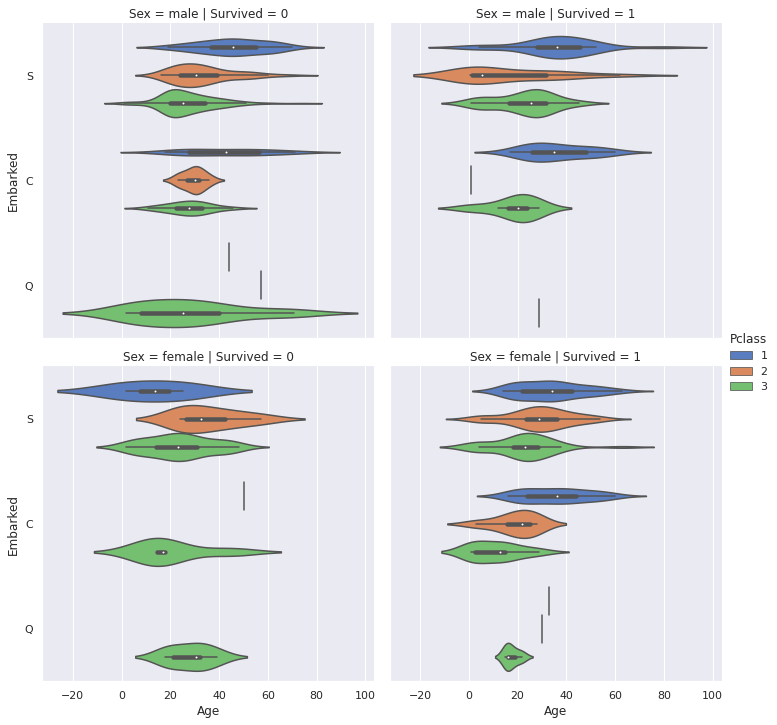

In [44]:
sns.catplot(x="Age", y="Embarked",
                hue="Pclass", row="Sex",
                data=train_df, col = 'Survived',
                kind="violin");

### Fare-Embarked-Pclass-Sex-Survived

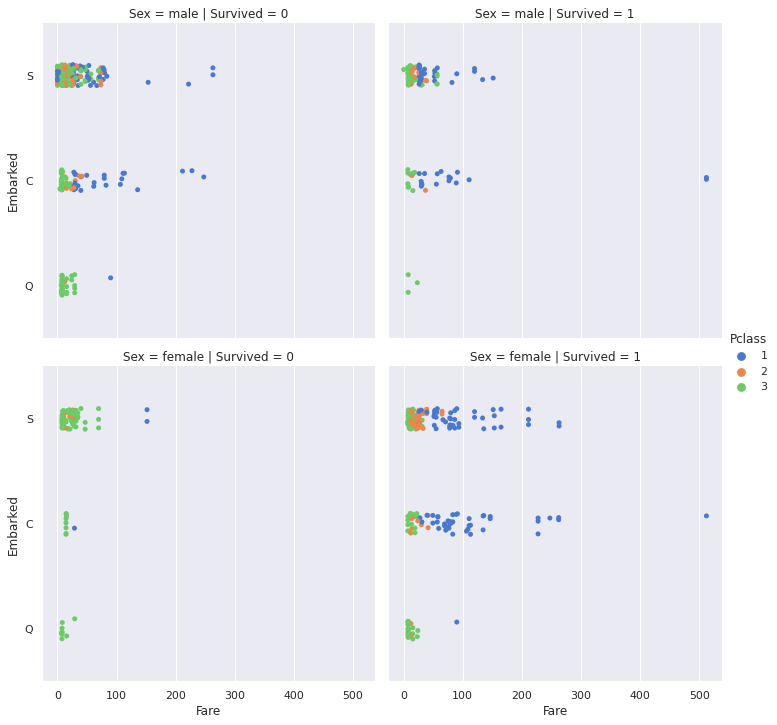

In [45]:
sns.catplot(x="Fare", y="Embarked",
                hue="Pclass", row="Sex",
                data=train_df, col = 'Survived');

### PairPlot

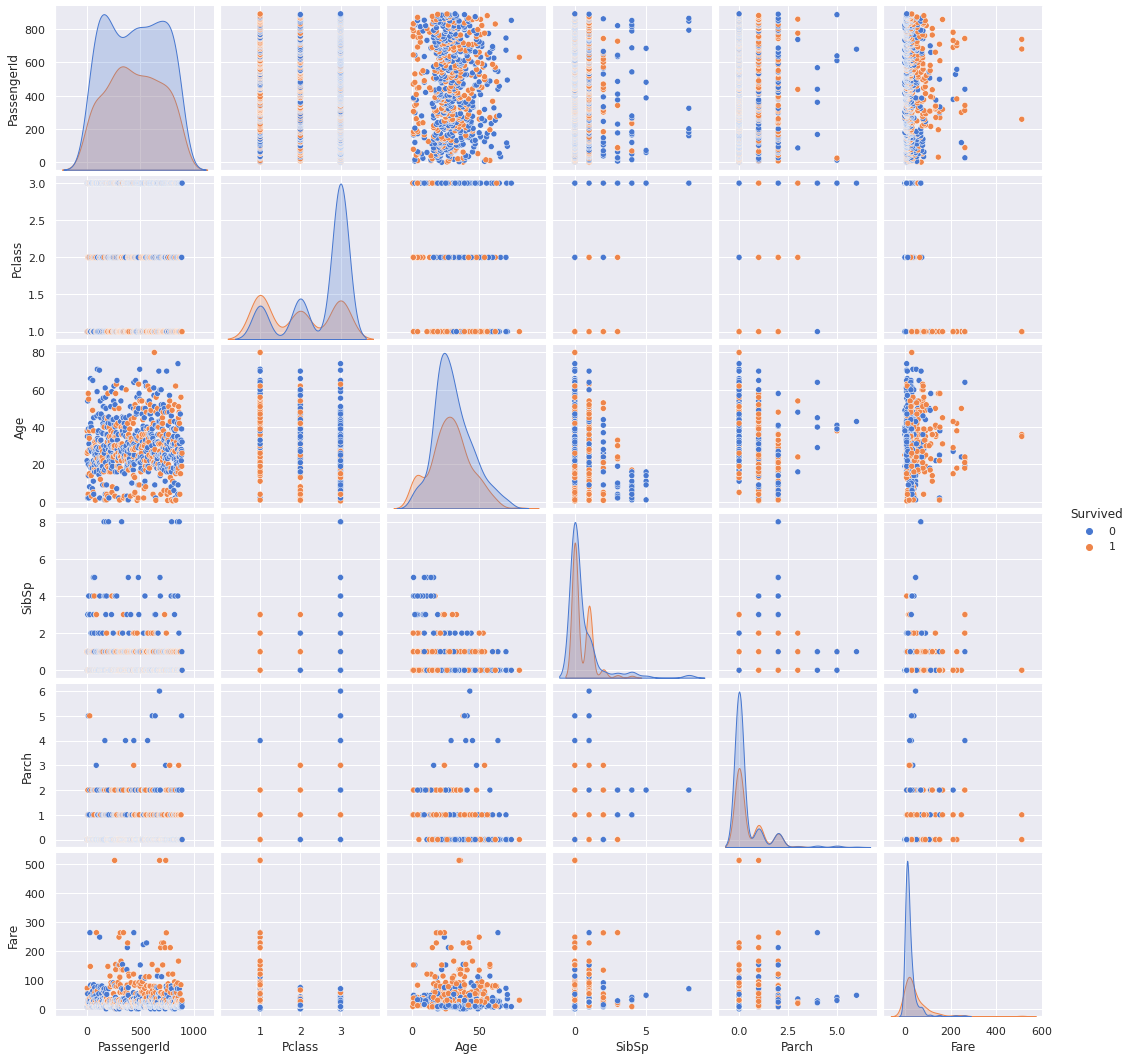

In [46]:
sns.pairplot(train_df, hue='Survived');